<a href="https://colab.research.google.com/github/edu015u/IA-Y-REDES-NEURONALES-2025/blob/main/ACTIVIDADES/AF6_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AF6: Aprendizaje supervisado, Árbol de decisión


Integrantes:

Blas Eduardo Escobar Rodríguez 1903990 N5

Gael Guevara Puente 2049066 N5

Ana Camila Parra Aguilar 2052187 N5

Christopher Daniel  Candelario López 2001039 N5

Jonathan Gonzalez Zuñiga 2108162 N5


## Explicación de la actividad

El objetivo de este notebook es construir, entrenar y evaluar un modelo de aprendizaje supervisado para una tarea de clasificación. Específicamente, se utilizará un clasificador de Árbol de Decisión para predecir si un tumor de cáncer de mama es maligno o benigno.

Para lograrlo, se usará el conjunto de datos "Breast Cancer Wisconsin (Diagnostic)", el cual viene precargado en la librería scikit-learn.

El flujo de trabajo seguirá los pasos estándar del machine learning:

Carga de Datos: Importar el dataset y sus características.

Preprocesamiento: Dividir los datos en un conjunto de entrenamiento (80%) y uno de prueba (20%) para asegurar una evaluación objetiva del modelo.

Entrenamiento: Ajustar el modelo de Árbol de Decisión utilizando únicamente los datos de entrenamiento.

Evaluación: Medir el rendimiento del modelo entrenado sobre los datos de prueba (que el modelo no ha visto antes) utilizando métricas clave como la matriz de confusión, la precisión (accuracy) y el reporte de clasificación.

Visualización: Generar una representación gráfica del árbol de decisión para interpretar cómo el modelo realiza sus predicciones.

1. Importar librerias

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

2. Cargar datos

In [13]:
# Cargar el conjunto de datos de cáncer de mama
cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

# Imprimir información sobre los datos para visualizarlos
print("Características (nombres de las columnas):", cancer_data.feature_names)
print("Clases (etiquetas):", cancer_data.target_names) # 0: maligno, 1: benigno

Características (nombres de las columnas): ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Clases (etiquetas): ['malignant' 'benign']


In [14]:
len(y)


569

In [15]:
y[0]

np.int64(0)

3. Preprocesamiento de datos (train_test_split)

In [16]:
# Se dividen los datos en 80% para entrenamiento y 20% para prueba
train_data, test_data, train_labels, test_labels = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print(f"Tamaño del conjunto de entrenamiento: {train_data.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {test_data.shape[0]} muestras")

Tamaño del conjunto de entrenamiento: 455 muestras
Tamaño del conjunto de prueba: 114 muestras


4. Selección y entrenamiento del modelo


In [17]:
# Crear el modelo de árbol de decisión
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
decision_tree_model.fit(train_data, train_labels)

print("¡El modelo ha sido entrenado exitosamente!")

¡El modelo ha sido entrenado exitosamente!


5. prueba de módelo

Matriz de Confusión:
[[40  3]
 [ 3 68]]


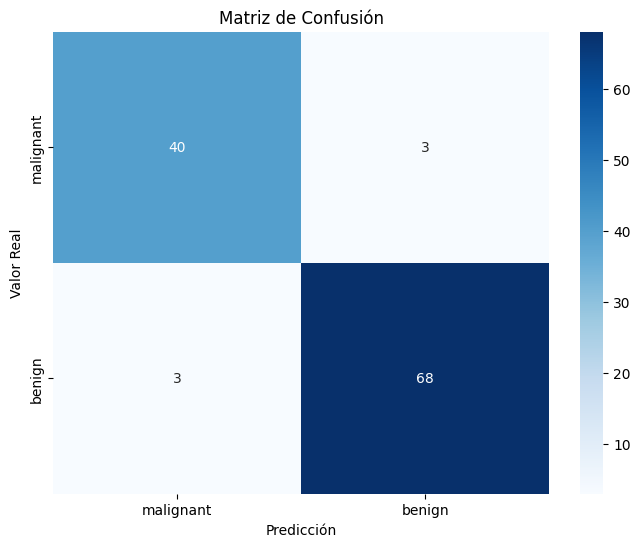

In [21]:
# Realizar predicciones con el conjunto de datos de prueba
predictions = decision_tree_model.predict(test_data)

# Obtener y visualizar la matriz de confusión
conf_matrix = confusion_matrix(test_labels, predictions)
print("Matriz de Confusión:")
print(conf_matrix)

# Visualización gráfica de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=cancer_data.target_names,
            yticklabels=cancer_data.target_names)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

In [20]:
# Algunas predicciones

print("--- Ejemplo 1 ---")
print(f"Predicción: {predictions[1]}")
print(f"Valor Real: {test_labels[1]}")

print("\n--- Ejemplo 2 ---")
print(f"Predicción: {predictions[20]}")
print(f"Valor Real: {test_labels[20]}")

print("\n--- Ejemplo 3 ---")
print(f"Predicción: {predictions[10]}")
print(f"Valor Real: {test_labels[10]}")

--- Ejemplo 1 ---
Predicción: 0
Valor Real: 0

--- Ejemplo 2 ---
Predicción: 1
Valor Real: 0

--- Ejemplo 3 ---
Predicción: 1
Valor Real: 1


In [22]:
# Calcular la precisión del modelo
accuracy = accuracy_score(test_labels, predictions)
print(f"Precisión del modelo: {accuracy:.4f}")
print("-" * 50)

# Obtener el reporte de clasificación completo
report = classification_report(test_labels, predictions, target_names=cancer_data.target_names)
print("Reporte de Clasificación:")
print(report)
print("-" * 50)

Precisión del modelo: 0.9474
--------------------------------------------------
Reporte de Clasificación:
              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

--------------------------------------------------


Árbol de decisión

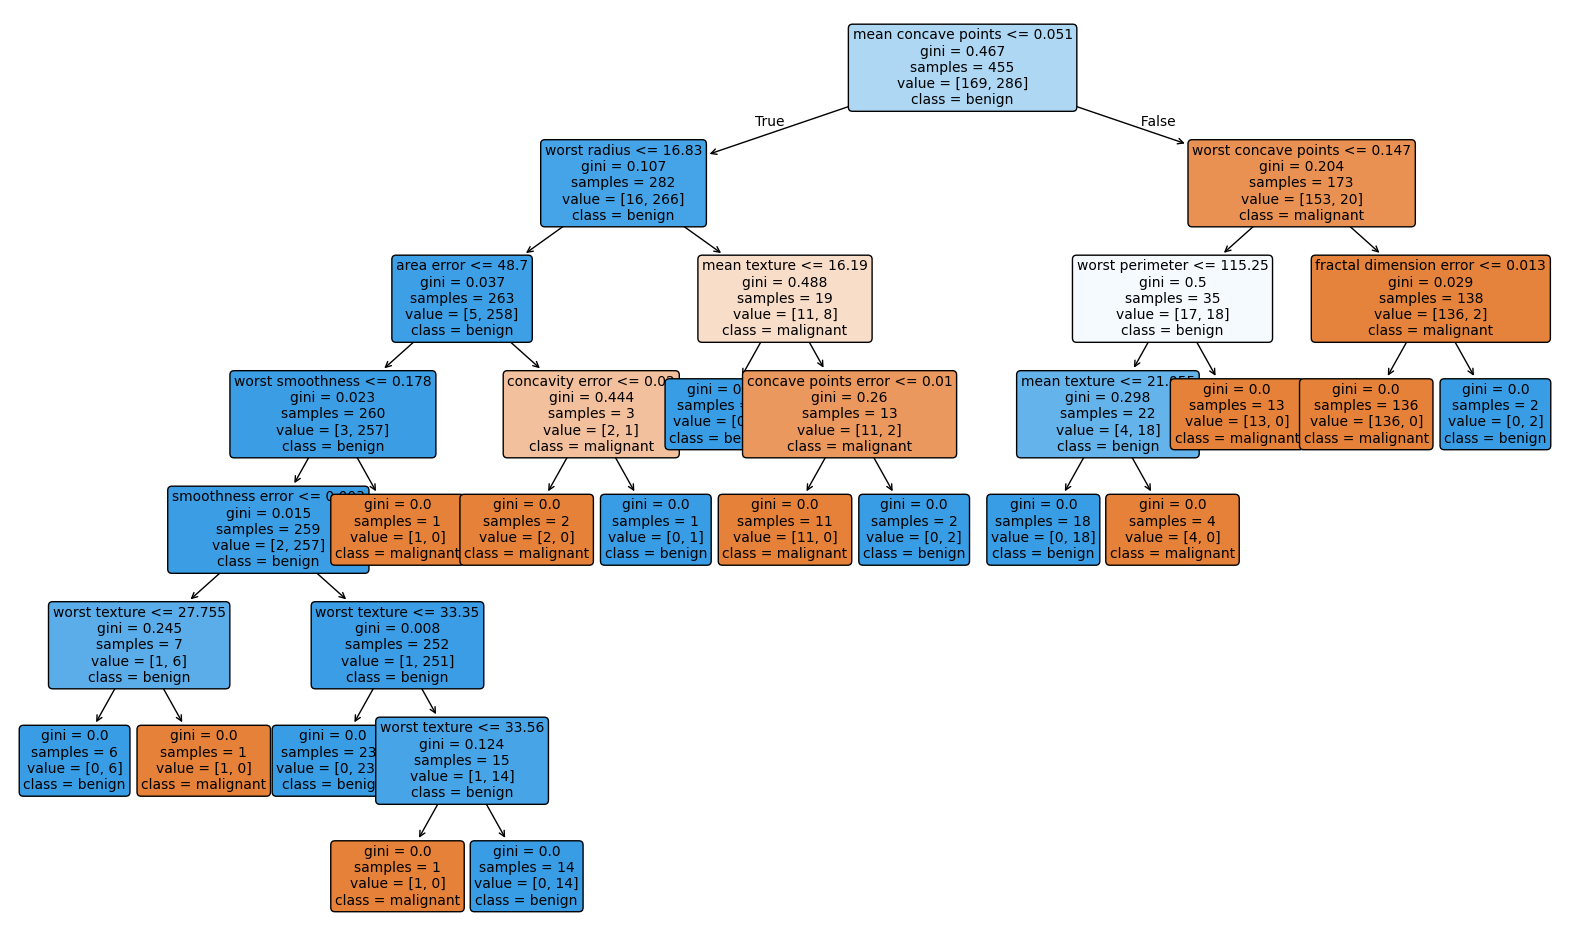

In [27]:
# Visualización de árbol de decisión
plt.figure(figsize=(20,12))
plot_tree(decision_tree_model,
          filled=True,
          feature_names=cancer_data.feature_names,
          class_names=cancer_data.target_names,
          rounded=True,
          fontsize=10)

# DPI=300
plt.savefig('decision_tree.png', dpi=300)
plt.show()